<a href="https://colab.research.google.com/github/anacarolinaz/Portfolio/blob/main/Sistema_de_Recomenda%C3%A7%C3%A3o_de_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sistema de Recomendação de Filmes**

Os **sistemas de recomendação,** resumidamente, são técnicas que fornecem sugestões de itens a serem recomendados para um usuário. Essas sugestões fornecidas tem como objetivo **auxiliar o usuário na tomada de decisões** sobre o que assistir, ouvir ou até mesmo comprar.


Já para o comércio, esta tornou-se uma das ferramentas mais poderosas e populares ao **recomendar produtos ou serviço de acordo os hábitos dos usuários**.

O seguinte projeto pode ser desenvolvido de diversas maneiras, mas sua intenção permanece a mesma: recomendar filmes para usuários baseando-se nos fatores de **popularidade**, **conteúdo**, **aprovação entre usuários semelhantes**.

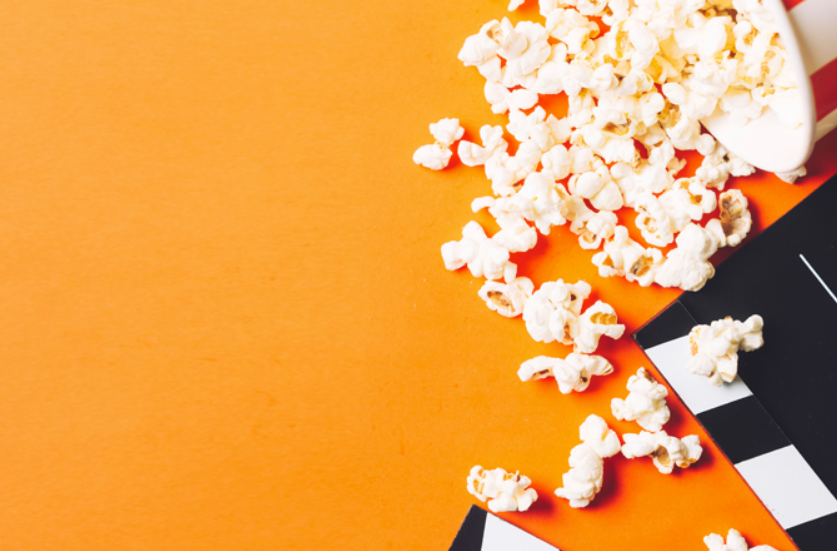

##**Tipos de Sistemas de Recomendação**
--------------------------

Antes de começar é importante pontuar os tipos de filtragem que serão utilizados no sistema



*   **Filtro Demográfico**: recomendações generalizadas para cada usuário, com base na popularidade e/ou gênero do filme. O sistema recomenda os mesmos filmes para usuários de caraterísticas geográficas diferentes, a ideia básica por trás desse sistema é que os filmes mais populares e aclamados pela crítica terão maior probabilidade de serem apreciados pelo público médio.

*   **Filtragem baseada em conteúdo**: Eles sugerem itens semelhantes com base em um item específico. Este sistema usa metadados de itens, como gênero, diretor, descrição, atores, etc. para filmes, para fazer essas recomendações. A ideia geral por trás desses sistemas de recomendação é que, se uma pessoa gostou de um determinado item, também gostará de um item semelhante a ele.

*   **Filtragem Colaborativa**: Este sistema combina pessoas com interesses semelhantes e fornece recomendações com base nessa correspondência. Os filtros colaborativos não requerem metadados de itens como suas contrapartes baseadas em conteúdo.





Agora vamos carregar os dados.

##**Importando os dados**
--------------------------

In [123]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df1 = pd.read_csv('../content/tmdb_5000_movies.csv')
df2 = pd.read_csv('../content/tmdb_5000_credits.csv')

In [3]:
df1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


O primeiro conjunto de dados contém as seguintes informações 


*  bugdet - Orçamento para produzir o filme
*  genres - Gênero
*  homepage - Site oficial do filme
*  id - Número de identificação 
*  keywords - Palavras chaves ou tags relacionadas ao filme
*  original_language - Idioma original em que o filme foi feito.
*  original_title - O título do filme antes de qualquer tradução ou adaptação
*  overview - Breve descrição do filme
*  popularity - Quantidade númerica que especifica a popularidade do filme
*  production_companies - Empresa responsável pela produção
*  production_countries - Páis em que foi produzido
*  release_data - Data de lançamento
*  revenue - Receita mundial gerada pelo filme
*  runtime - Tempo de duração em minutos
*  status - "Lançado" ou "Rumor"
*  tagline - Slogan do filme
*  title - Título do filme
*  vote_average - classificações médias das avaliações dos usuários
*  vote_count - contagem das avaliações recebidas


















In [4]:
df2.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


No segundo conjunto de dadas temos as seguintes informações apresentadas: 


*   movie_id - Número de identificação do filme
*   title - Título do filme
*   cast - Nome dos atores principais e coadjuvantes no elenco 
*   crew - Nome do diretor, escrito, compositores etc...





Agora vamos juntas os dois conjuntos de dados da coluna 'id' para simplificar a análise 

In [5]:
df2.columns = ['id', 'cast', 'crew', 'title']
df1 = df1.merge(df2, on='id') #mergiando e definindo qual o identificador para ser usado como chave primária

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
df1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew,title_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Nosso dataset está organizado de uma forma mais simplificada, como podemos ver nas primeiras 5 entradas, para podermos iniciar a construção do sistema.

##**Filtragem Demográfica**
---

Antes de começar precisamos de: **uma métrica para avaliar o filme**, **calcular a pontuação de cada filme**, **classificar as pontuações e recomendar o filme com melhor classificação para os usuários**.



Usaremos um equação aplicada na classificação ponderada utilizada pelo IMDB para calcular a pontuação (**Exemplo: um filme de classificação média de 9,8 com apenas 3 votos não pode ser considerado melhor que um filme com 7,8 mas 40 votos.**). Faremos isso porque ao usar classificações médias como pontuação estamos desconsiderando o peso da popularidade (número de votos). 

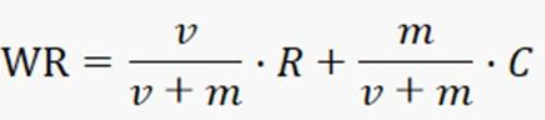

Onde:


*  **V** é o número de votos do filme
*   **M** é o número mínimo de votos exigidos para ser exibido no gráfico
*   **R** é a avaliação média do filme
*   **C** é a voto médio global, utilizando todos os dados disponíveis



Podemos observar que os valores referentes a V (vote_count) e R (vote_average) já estão presentes, portanto temos que definir C, que pode ser calculado como:

In [15]:
C = df1['vote_average'].mean()
#Exibir Valores
C

6.092171559442011

Observa-se que a **classificação média para todos os filmes é de aproximadamente 6 em uma escala de 10**. Para a **próxima etapa** temos de determinar um **valor apropriado para M**, os votos mínimos necessários para serem listados no gráfico. Usaremos o **percentil 90** como nosso ponto de corte. **Em outras palavras, para um filme figurar nas paradas, ele deve ter mais votos do que pelo menos 90% dos filmes da lista.**

In [13]:
m = df1['vote_count'].quantile(0.9)
#Exibir Valores
m

1838.4000000000015

Agora filtraremos os filmes que se classificam para o gráfico popular

In [12]:
q_movies = df1.copy().loc[df1['vote_count'] >= m]
#Exibir Valores
q_movies.shape

(481, 23)

Gostaria de explicar detalhadamente como estruturamos no código acima: 

Ao utilizarmos **df1.copy()** é feita uma chamada 'cópia rasa' do dataframe, onde se constrói um novo objeto composto e então (na medida do possível) inserimos nele referências aos objetos encontrados no original.

Logo após isso podemos observar o 'loc' que é utilizado para localizar os valores desejados no dataframe.

Resultado: Em **481 Linhas e 23 Colunas** são encontrados filmes que apresentam **número de votos maior ou igual** a **M**



---



Agora, precisamos calcular nossa métrica para cada filme qualificado. Para fazer isso, definiremos uma função **weighted_rating()** baseada na equação, e definiremos um novo recurso **score** (pontuação dos filmes), do qual calcularemos o valor aplicando esta função ao nosso DataFrame de filmes qualificados:

In [16]:
def weighted_rating(x, m=m, C=C):
  v = x['vote_count']
  r = x['vote_average']
  # Fórmula Weighted Rating IMDB
  return (v/(v+m) * r) + (m/(m+C) * C)
  

In [17]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [18]:
q_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew,title_y,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",12.301519
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",10.970762
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",10.534933
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",12.395430
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",9.341886


Agora, vamos ordenar o dataframe baseado no score e mostrar os 10 filmes com melhor score.

---



In [19]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 10 movies
q_movies[['title_x', 'vote_count', 'vote_average', 'score']].head(10)

,title_x,vote_count,vote_average,score
96,Inception,13752,8.1,13.216908
65,The Dark Knight,12002,8.2,13.182856
1881,The Shawshank Redemption,8205,8.5,13.016162
662,Fight Club,9413,8.3,13.015888
95,Interstellar,10867,8.1,13.000025
3232,Pulp Fiction,8428,8.3,12.885772
809,Forrest Gump,7927,8.2,12.728346
94,Guardians of the Galaxy,9742,7.9,12.717917
262,The Lord of the Rings: The Fellowship of the Ring,8705,8.0,12.677130
287,Django Unchained,10099,7.8,12.670823


Agora os filmes ordenados pelo vote_average - classificação média

In [20]:
df1_q = df1.sort_values('vote_count', ascending=False)

#Print the top 10 movies
df1_q[['title_x', 'vote_count', 'vote_average']].head(10)

,title_x,vote_count,vote_average
96,Inception,13752,8.1
65,The Dark Knight,12002,8.2
0,Avatar,11800,7.2
16,The Avengers,11776,7.4
788,Deadpool,10995,7.4
95,Interstellar,10867,8.1
287,Django Unchained,10099,7.8
94,Guardians of the Galaxy,9742,7.9
426,The Hunger Games,9455,6.9
127,Mad Max: Fury Road,9427,7.2


###É muito comum que sistemas de recomendação recomendem apenas os filmes mais populares, vamos estruturar um gráfico para representar essa possibilidade

In [21]:
df1_q = df1.sort_values('vote_average', ascending=False)
df1_q[['title_x', 'vote_count', 'vote_average']].head(10)

,title_x,vote_count,vote_average
3519,Stiff Upper Lips,1,10.0
4247,Me You and Five Bucks,2,10.0
4045,"Dancer, Texas Pop. 81",1,10.0
4662,Little Big Top,1,10.0
3992,Sardaarji,2,9.5
2386,One Man's Hero,2,9.3
2970,There Goes My Baby,2,8.5
1881,The Shawshank Redemption,8205,8.5
2796,The Prisoner of Zenda,11,8.4
3337,The Godfather,5893,8.4


Text(0.5, 1.0, 'Popular Movies')

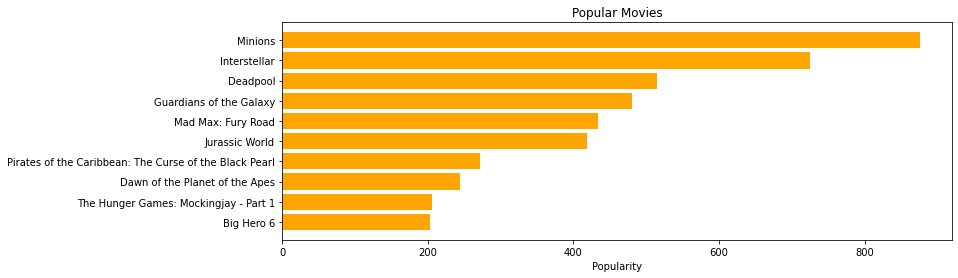

In [22]:
popular = df1.sort_values('popularity', ascending=False).head(10)

#Tamanho
plt.figure(figsize=(12,4))
#Definições do gráfico
plt.barh(popular['title_x'],popular['popularity'], align='center', color='orange')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

###Com esta representação, é importante se ter em mente que esses recomendadores geográficos não levam em consideração **fatores sensíveis ao usuário** como interesses e gostos específicos. Eles apenas fornecem um **gráfico baseado em recomendações gerais**. 
###É recomendado então que se utilize um **sistema** mais **refinado**, o que será introduzido em seguida - **Filtragem de Base de Conteúdo** 




##**Filtragem de base de conteúdo**

---



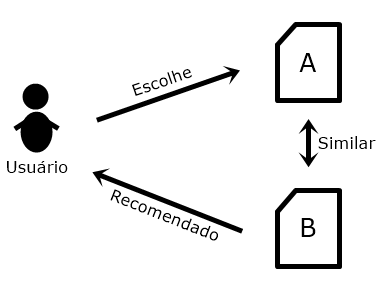

###Nesse sistema de recomendação, o conteúdo do filme e suas características de composição (gênero, duração, elenco, equipe, palavra-chave, etc) são determinantes para encontrar outros títulos semelhantes.

###Então, os filmes com maior probabilidade de serem semelhantes são recomendados.

E como faremos isso? Nós calcularemos as pontuações de similaridade em pares para todos os filmes com base em suas descrições de enredo e recomendaremos filmes com base nessa pontuação de similaridade.

Agora, vamos olhar nossos dados novamente

In [27]:
df1.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew,title_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
df1['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

**A coluna 'overview' agrupa as descrições do filmes, as quais serão utilizadas para construir nosso gráfico.**

---



Agora, utilizaremos uma técnica medida chamada '**Term Frequency-Inverse Document Frequency (TF-IDF)**' para converter o vetor de palavras cada overview. o TF-IDF tem como objetivo determinar a importância de determinada palavra de determinado documento em relação a uma coleção de documentos. 

Isso nos dará uma **matriz onde cada coluna representa uma palavra no vocabulário geral e cada linha representa um filme**. 

Eu irei utilizar neste projeto uma classe da biblioteca **scikit-learn** que oferece soluções para TF-IDF.

In [28]:
#Aqui importamos a classe 
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer. Remove todas as palavras em inglês do tipo "The", "a", etc
tfidf = TfidfVectorizer(stop_words='english') #TfidfVectorizer(stop_words='portuguese') 

#Substitui Nan por uma string vazia
df1['overview'] = df1['overview'].fillna('')

#Constrói a matrix TF-IDF adequada e transforma em dados
tfidf_matrix = tfidf.fit_transform(df1['overview'])

#Saída de dados de TF-IDF
tfidf_matrix.shape

(4803, 20978)

Com esse Output vemos que mais de 20,000 palavras diversar foram usadas para descrever nossos 4800 filmes nesse conjunto de dados.

A partir dessa matriz, calcularemos uma **pontuação de similaridade**

Usando a **similaridade do cosseno** para calcular **uma quantidade numérica que denota a similaridade entre dois filmes**. Usamos a pontuação de similaridade do cosseno, pois é independente da magnitude e é relativamente fácil e rápido de calcular. Matematicamente, é definido da seguinte forma:

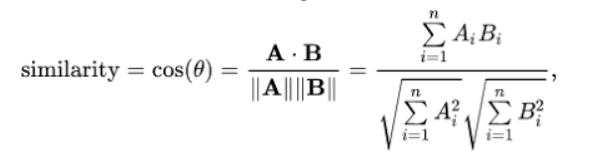

Como usamos o **vetorizador TF-IDF**, o cálculo do **produto escalar** nos dará diretamente a **pontuação de similaridade do cosseno**. Portanto, usaremos linear_kernel() de sklearn em vez de cosine_similarities(), pois é mais rápido.

In [29]:
# Importar linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

# Computar a matriz de similaridade do cosseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [30]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

Vamos definir uma função que recebe o título de um filme como entrada e gera uma lista dos 10 filmes mais semelhantes. Em primeiro lugar, para isso, precisamos de um mapeamento reverso de títulos de filmes e índices DataFrame. Em outras palavras, precisamos de um mecanismo para identificar o índice de um filme em nosso DataFrame de metadados, dado seu título.

In [34]:
indices = pd.Series(df1.index, index=df1['title_x']).drop_duplicates()
type(indices)

pandas.core.series.Series

In [35]:
indices.head()

title_x
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

**Agora estamos em uma boa posição para definir nossa função de recomendação. Estas são as seguintes etapas que seguiremos:**

- Obtenha o índice do filme dado seu título.
- Obtenha a lista de pontuações de similaridade de cosseno para aquele filme específico com todos os filmes. Converta-o em uma lista de tuplas em que o primeiro elemento é sua posição e o segundo é a pontuação de similaridade.
- Classifique a lista de tuplas mencionada acima com base nas pontuações de similaridade; ou seja, o segundo elemento.
- Obtenha os 10 principais elementos desta lista. Ignore o primeiro elemento, pois ele se refere a si mesmo (o filme mais semelhante a um determinado filme é o próprio filme).
- Retorne os títulos correspondentes aos índices dos elementos principais.

In [36]:
#Teste 1 - Interstellar 
idx = indices['Interstellar']
idx

95

Obtemos as pontuações de semelhança entre pares de todos os filmes com aquele filme

In [62]:
#Obter similaridade
sim_scores = list(enumerate(cosine_sim[idx]))

Classificamos os filmes com base nas pontuações de similaridade

In [63]:
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

Obtemos as pontuações dos 10 filmes mais semelhantes

In [64]:
sim_scores = sim_scores[1:11]
sim_scores

[(1709, 0.1374610632519996),
 (300, 0.1123017525914955),
 (4353, 0.10668183247940491),
 (220, 0.09354611949836693),
 (2260, 0.08980952686936508),
 (268, 0.08359239087109394),
 (1352, 0.0794225708799716),
 (4176, 0.07929221042439508),
 (2648, 0.07552545309904149),
 (634, 0.07512684159268716)]

Agora obtemos os índices dos 10 filmes mais semelhantes com 'tuples'

In [71]:
top_indices = [i[0] for i in sim_scores]
top_indices

[1709, 300, 4353, 220, 2260, 268, 1352, 4176, 2648, 634]

In [73]:
df1['title_x'].iloc[top_indices]

1709         Space Pirate Captain Harlock
300                     Starship Troopers
4353                    The Green Inferno
220                            Prometheus
2260                      All Good Things
268                         Stuart Little
1352                              Gattaca
4176    Battle for the Planet of the Apes
2648                       Winnie Mandela
634                            The Matrix
Name: title_x, dtype: object

Esses são os 10 filmes mais semelhantes a 'Interstellar'. É possível notar a funcionalidade de .iloc() agrupando em colunas e linhas os índices e títulos dos filmes 

---



Agora é hora de obter algumas recomendações com o modelo 

In [117]:
def get_recommendations(title_x, cosine_sim=cosine_sim):
  idx = indices[title_x]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]
  movie_indices = [i[0] for i in sim_scores]
  return df1['title_x'].iloc[movie_indices] 

Primeiro título exemplo para recomendação: The Dark Knight Rises

In [118]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title_x, dtype: object

Segundo título exemplo para recomendação: Avatar

In [120]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title_x, dtype: object

###A recomendação pode ser refinada, mas o overview de dois filmes podem ser diferentes e mesmo assim eles podem ser boas recomendações para um usuário. Para que apenas a descrição do filme seja utilizada como fator de recomendação, podemos utilizar a **filtragem colaborativa**.



##**Filtragem Colaborativa**

---



Nosso mecanismo baseado em conteúdo sofre de algumas limitações severas. Ele só é capaz de sugerir filmes próximos a um determinado filme. Ou seja, não é capaz de capturar gostos e fornecer recomendações entre gêneros.

Além disso, o mecanismo que construímos não é realmente pessoal, pois não captura os **gostos e preconceitos pessoais de um usuário**. **Qualquer pessoa que consultar nosso mecanismo para recomendações baseadas em um filme receberá as mesmas recomendações para aquele filme, independentemente de quem ele / ela seja.**

Portanto, nesta seção, usaremos uma técnica chamada **Filtragem Colaborativa** para fazer recomendações aos usuários. Duas orientações serão utilizadas:

**Filtragem baseada em usuário** - Esses sistemas recomendam produtos para um usuário que usuários semelhantes gostaram. Para medir a similaridade entre dois usuários, podemos usar a correlação de Pearson ou a similaridade de cosseno.

**Filtragem baseada em item** - Em vez de medir a semelhança entre os usuários, o CF baseado em item recomenda itens com base em sua semelhança com os itens que o usuário-alvo classificou. Da mesma forma, a similaridade pode ser calculada com correlação de Pearson ou similaridade de cosseno. (Método predominante nos SR atuais)

**Observação - Problemas podem ser encontrados:**

**Problema 1: escalabilidade. O cálculo cresce com o cliente e com o produto.**

**Problema 2: esparsidade. Vários filmes não vão ter avaliação**

####*Singular Value Decomposition*

Uma maneira de lidar com o problema de **escalabilidade e dispersão** criado pelo CF é utilizar um **Singular Value Decomposition** para **capturar a semelhança entre usuários e itens**. Essencialmente, queremos transformar o problema de recomendação em um problema de otimização. Podemos ver como somos bons em prever a classificação de itens dado um usuário. Uma métrica comum é **Root Mean Square Error (RMSE)**. Quanto menor o RMSE, melhor será o desempenho.

Agora, falando sobre fator latente, você pode estar se perguntando o que é?

É uma ideia ampla que descreve uma propriedade ou conceito que um usuário ou um item tem. Por exemplo, para música, o fator latente pode se referir ao gênero ao qual a música pertence. SVD diminui a dimensão da matriz de utilidade, extraindo seus fatores latentes. Essencialmente, mapeamos cada usuário e cada item em um espaço latente com dimensão r. Portanto, isso nos ajuda a entender melhor a relação entre usuários e itens à medida que se tornam diretamente comparáveis.

A figura abaixo ilustra essa ideia.

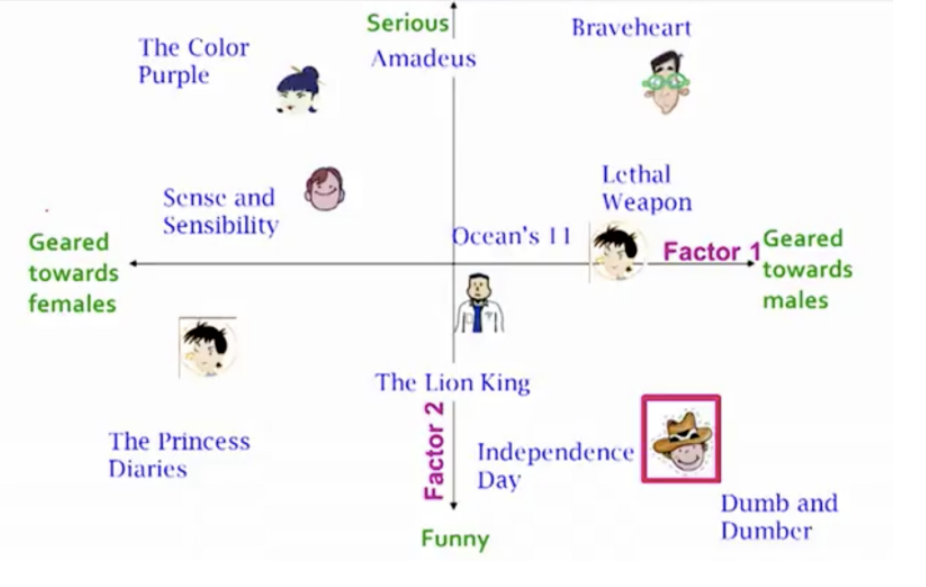

Dito isso, vamos ver como implementar isso. Como o conjunto de dados que usamos antes não tinha userId (que é necessário para a filtragem colaborativa), vamos carregar outro conjunto de dados.

Estaremos usando a 'Surpresa' (https://surprise.readthedocs.io/en/stable/index.html) biblioteca para implementar o SVD.

In [127]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 9.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619428 sha256=479c24d2f47096386f152bafe130171400a4a5c09672e0348c14b744dba8f38c
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [133]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('/content/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


**Pode-ser notar que este dataset tem como padrão de classificação uma escala de 5, diferente dos últimos utilizados.**

In [143]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [147]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
#Indicativo de que serão construídas boas predições com o conjunto de dados em questão

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8934  0.8974  0.8941  0.9008  0.8981  0.8968  0.0027  
MAE (testset)     0.6881  0.6907  0.6869  0.6966  0.6909  0.6906  0.0034  
Fit time          5.16    7.24    7.75    4.55    4.06    5.75    1.48    
Test time         0.14    0.60    0.18    0.13    0.18    0.25    0.18    


{'fit_time': (5.155142545700073,
  7.237365245819092,
  7.751266241073608,
  4.5460145473480225,
  4.058495998382568),
 'test_mae': array([0.68806725, 0.69070337, 0.68686941, 0.69661463, 0.69089396]),
 'test_rmse': array([0.89338195, 0.89742042, 0.89414358, 0.90083171, 0.89813401]),
 'test_time': (0.135972261428833,
  0.6040010452270508,
  0.17927312850952148,
  0.13082385063171387,
  0.17751026153564453)}

**Obtemos um erro médio quadrático médio de 0,89 aprox, que é mais do que bom o suficiente para nosso caso. Vamos agora treinar em nosso conjunto de dados e chegar às previsões.**

In [136]:
data

In [137]:
trainset = data.build_full_trainset() # Do not split the dataset into folds and just return a trainset as is, built from the whole dataset.
svd.fit(trainset)

Vamos escolher o usuário com ID de usuário 1 e verificar as avaliações que ele(a) deu.

In [138]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [139]:
svd.predict(1, 3671, verbose=True).est # user, item, r_ui

user: 1          item: 3671       r_ui = None   est = 3.05   {'was_impossible': False}


3.047641605087524

##**Conclusão**

---



**Neste projeto foram desenvolvidos sistemas recomendadores usando filtragem demográfica, baseada em conteúdo e colaborativa. Embora a filtragem demográfica seja muito elementar e não possa ser usada na prática, os Sistemas Híbridos podem tirar proveito da filtragem colaborativa e baseada em conteúdo, pois as duas abordagens são comprovadamente complementares. Este modelo é de estrutura básica e deve ser utilizado para fins de estudo e compreensão básica dos sistemas de recomendação.**

---



**Dados e referências:**

Datasets 
- df1/df2/ratings = https://www.kaggle.com/rounakbanik/movie-recommender-systems

Referências utilizadas para fins de pesquisa durante a construção 
- https://math.stackexchange.com/questions/169032/understanding-the-imdb-weighted-rating-function-for-usage-on-my-own-website
- https://pt.wikipedia.org/wiki/Similaridade_por_cosseno
https://slidetodoc.com/presentation_image_h/206fae3b33d04ddf25464275f30e29e3/image-3.jpg

Bibliografia 

- Python para Análise de dados (Tratamento de dados com pandas, numpy e ipython) 2ª edição
